In [1]:
import os
import json
import numpy as np
import pandas as pd
import sklearn
# import torch
from tensorflow import keras  # keras-tf

import matplotlib.pyplot as plt
from utils.dir_utils import makedir_exist_ok

## Visualize Data

In [2]:
# paths
competition_name = "digit-recognizer"
data_dir = os.path.expanduser(f"~/.kaggle/competitions/{competition_name}")
ckpt_dir = os.path.expanduser(f"~/Documents/DeepLearningData/{competition_name}/ckpts")
makedir_exist_ok(ckpt_dir)

In [3]:
# load data
data_train = pd.read_csv(os.path.join(data_dir, "train.csv")).values
data_test = pd.read_csv(os.path.join(data_dir, "test.csv")).values
num_train = data_train.shape[0]
num_test = data_test.shape[0]

In [4]:
data_train.shape

(42000, 785)

In [5]:
data_test.shape

(28000, 784)

In [6]:
print(num_train, num_test) # 42000 vs 28000, 3 vs 2

42000 28000


In [7]:
train_labels = data_train[:, 0].astype(int)

In [8]:
test_images = data_test.reshape(num_test, 28, 28, 1)  # NHWC, channel last

In [9]:
np.max(train_labels)

9

In [10]:
np.min(train_labels)

0

In [11]:
train_labels = data_train[:, 0].astype(int)
train_labels = keras.utils.to_categorical(train_labels)

In [12]:
# data_train = sklearn.utils.shuffle(data_train) # shuffle after loading train csv

In [13]:
data_train

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [14]:
# convert data
X = data_train[:, 1:].reshape(data_train.shape[0], 28, 28, 1) # NHWC, channel last
X = X.astype(float)
X /= 255.0
X = torch.from_numpy(X)

y = data_train[:, 0]
y = y.astype(int)
y = torch.from_numpy(y)
y = y.view(data_train.shape[0], -1)

for i in range(100):
    img, label = X[i][:,:,0], y[i]
    plt.imshow(img, cmap="gray")

NameError: name 'torch' is not defined

In [15]:
plt.imshow(img, cmap="gray")

NameError: name 'img' is not defined

In [16]:
y[i]

NameError: name 'y' is not defined

In [17]:
# paths
competition_name = "digit-recognizer"
data_dir = os.path.expanduser(f"~/.kaggle/competitions/{competition_name}")

# prepare model type, ResNetv2
n, version = 2, 2  # n, order of ResNetv2, 2 or 6
depth = 20 # model_depth(n, version)
model_type = 'ResNet%dv%d' % (depth, version)

predict = np.load(os.path.join(data_dir, f"./{model_type}-predict.npy"))

In [18]:
predict.shape

(28000, 10)

In [19]:
predict[0]

array([6.2135430e-14, 2.1586426e-19, 1.0000000e+00, 4.7236568e-12,
       1.5598893e-14, 3.8865599e-16, 5.0016144e-14, 1.8680814e-12,
       9.1941190e-13, 1.3156379e-13], dtype=float32)

In [24]:
label = np.argmax(predict, axis=1)
image_id = np.arange(num_test) + 1
submission_df = pd.DataFrame({
    "ImageId": image_id,
    "Label": label
})
submission_df.to_csv(os.path.join(data_dir, f"{model_type}-submission.csv"), index=False)

In [25]:
label

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

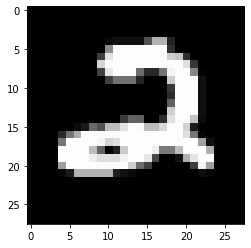

In [21]:
plt.imshow(test_images[0,:,:,0], cmap="gray")

In [22]:
submission_df

,ImageId,Label
0,1,2
1,2,2
2,3,2
3,4,2
4,5,2
...,...,...
27995,27996,2
27996,27997,2
27997,27998,2
27998,27999,2


In [27]:
score = 0.99353
print(f"{score*num_test}/{num_test}")

27818.84/28000
